<a href="https://colab.research.google.com/github/xblam/demo/blob/master/logistic_regression_math123_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
np.random.seed(0)

In [35]:
data = pd.read_csv("fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


<Axes: >

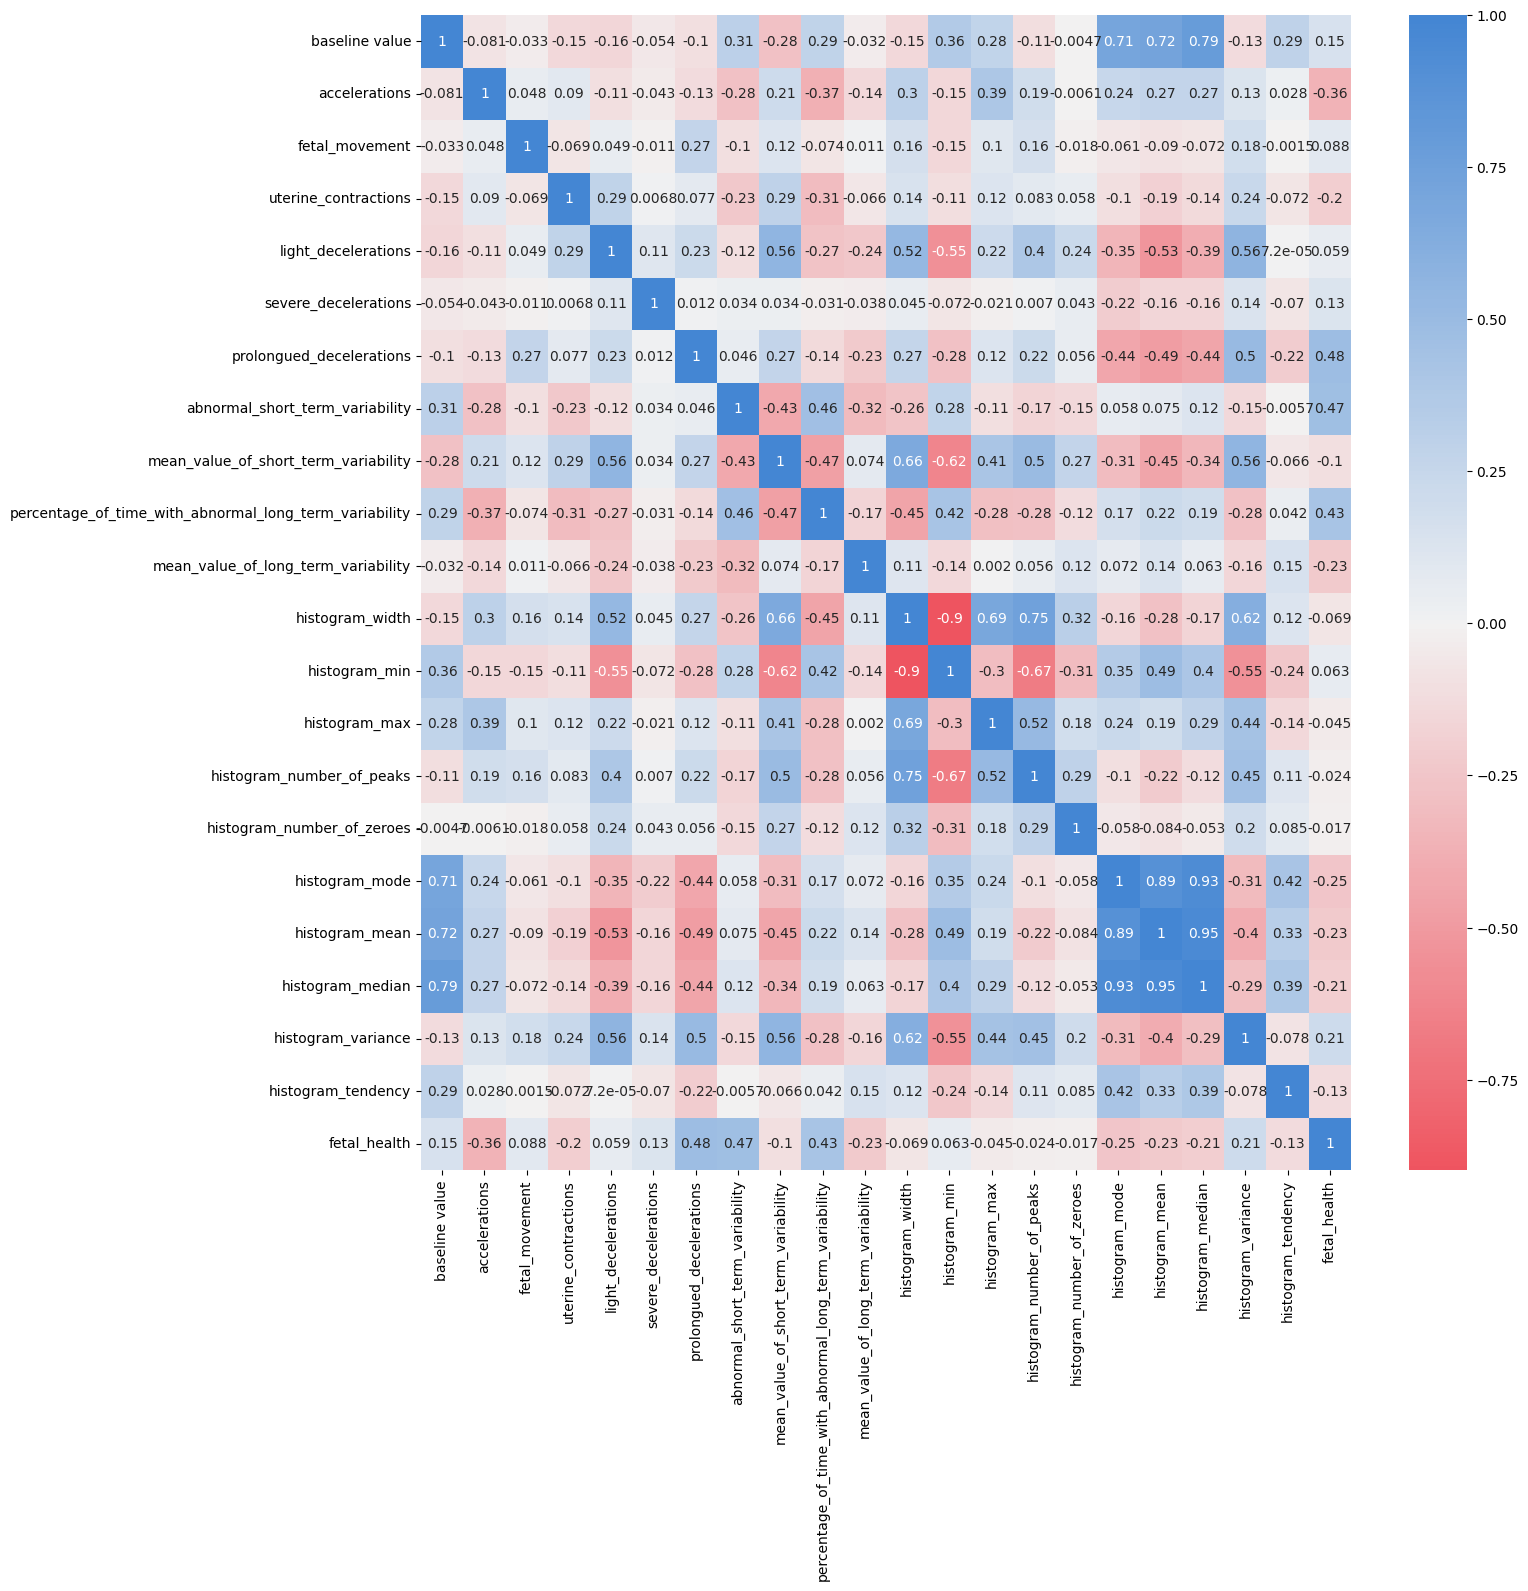

In [36]:
corrmat= data.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(10, 250, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [37]:
columns_to_remove = ['histogram_mean', 'histogram_min', 'histogram_max', 'histogram_median', 'histogram_mode', 'histogram_width', 'histogram_number_of_peaks', 'histogram_variance', 'histogram_tendency', 'histogram_number_of_zeroes']

#remove the columns that we do not want
data = data.drop(columns=columns_to_remove)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

<Axes: >

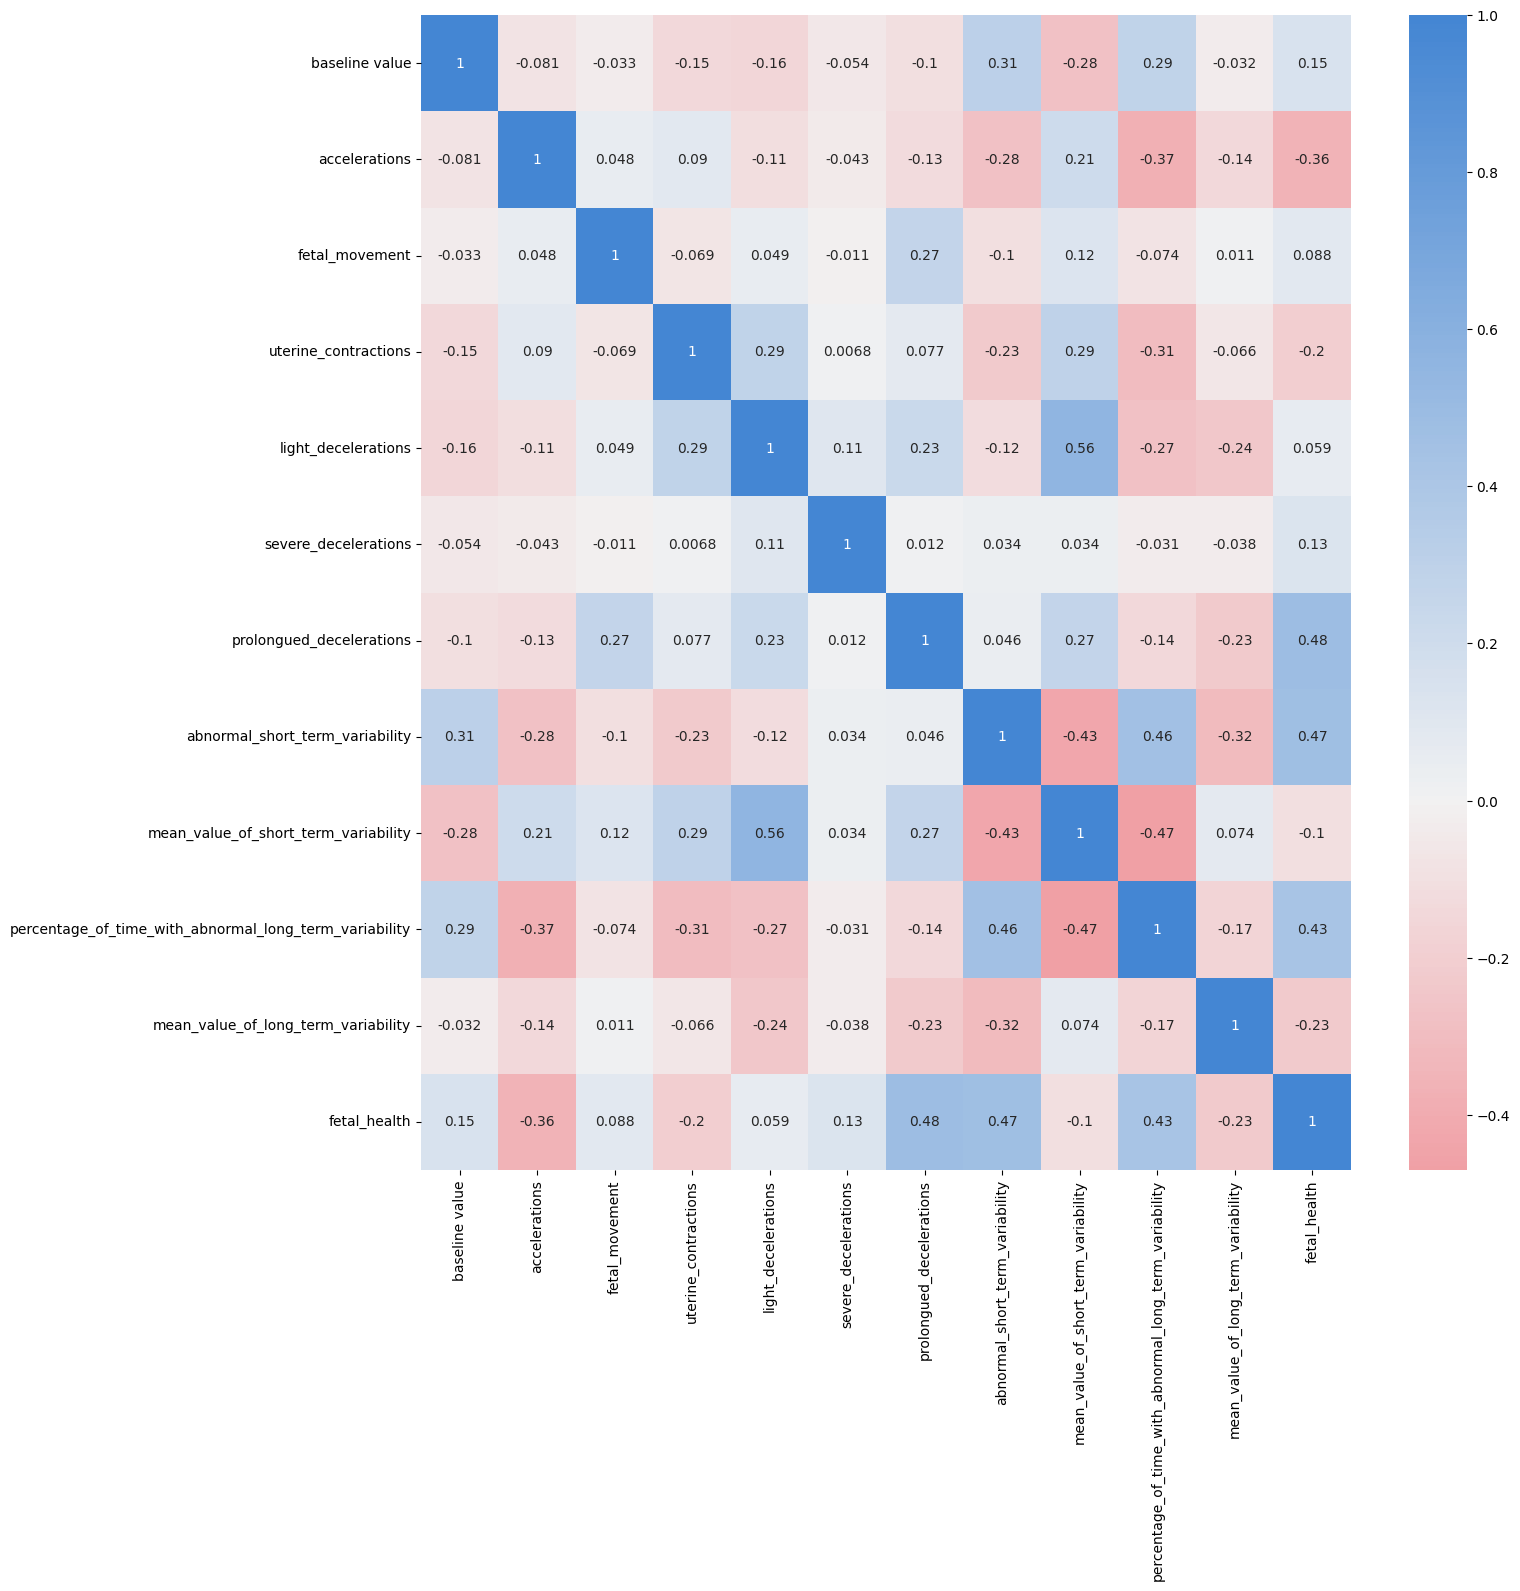

In [39]:
corrmat= data.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(10, 250, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

<ipython-input-40-4b4cb93a684a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x="fetal_health",palette=colours)


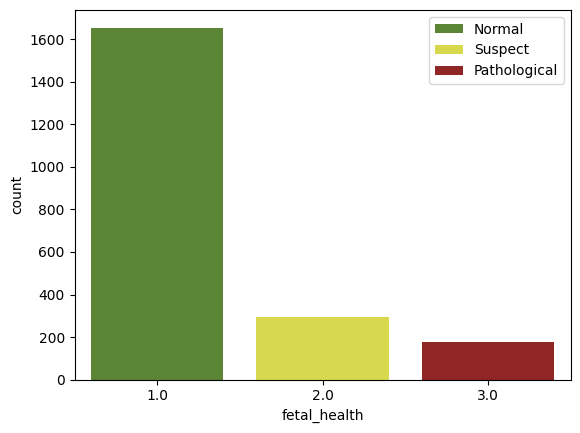

In [40]:
#quick graph to show the distribution of the fetuses
colours=["#5A9227","#EFEF37", "#A01414"]
sns.countplot(data= data, x="fetal_health",palette=colours)
plt.legend(labels=["Normal", "Suspect", "Pathological"])

<Axes: >

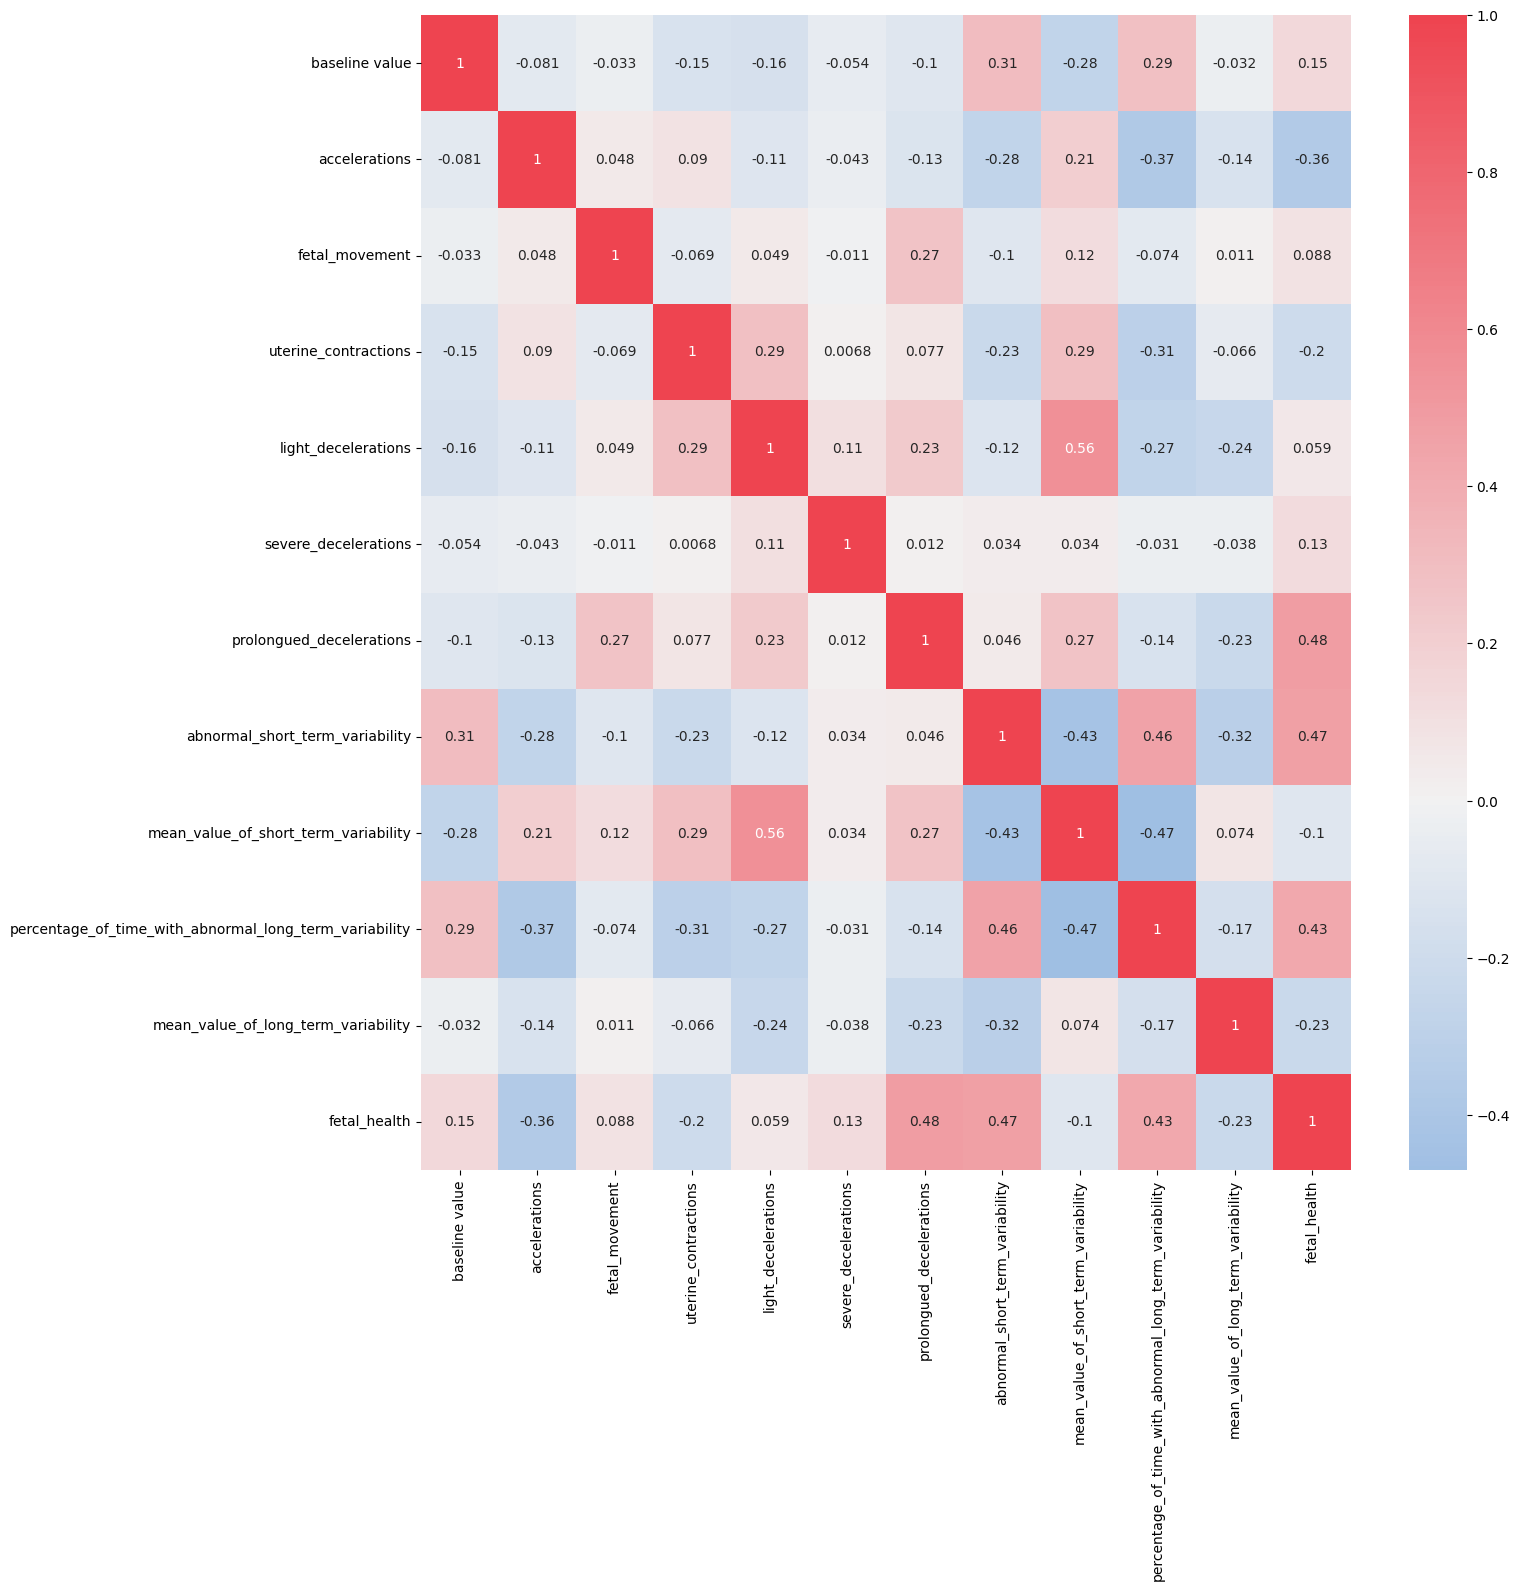

In [41]:
corrmat= data.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [42]:
#spliting test and training sets
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T



,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


In [43]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.2,random_state=51)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [45]:
sum = 0;
for i in range(10):
    X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=i)
    # Initializing the logistic regression classifier
    clf = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed

    # Training the logistic regression classifier
    clf.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Printing classification report
    print(classification_report(y_test, y_pred))
    sum+= accuracy

print(sum/10)



Accuracy: 0.8730407523510971
              precision    recall  f1-score   support

         1.0       0.92      0.95      0.93       494
         2.0       0.62      0.57      0.59        86
         3.0       0.80      0.69      0.74        58

    accuracy                           0.87       638
   macro avg       0.78      0.74      0.76       638
weighted avg       0.87      0.87      0.87       638

Accuracy: 0.8934169278996865
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.95       490
         2.0       0.71      0.62      0.67        96
         3.0       0.90      0.67      0.77        52

    accuracy                           0.89       638
   macro avg       0.84      0.76      0.79       638
weighted avg       0.89      0.89      0.89       638

Accuracy: 0.890282131661442
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       501
         2.0       0.67      0.66      0.67

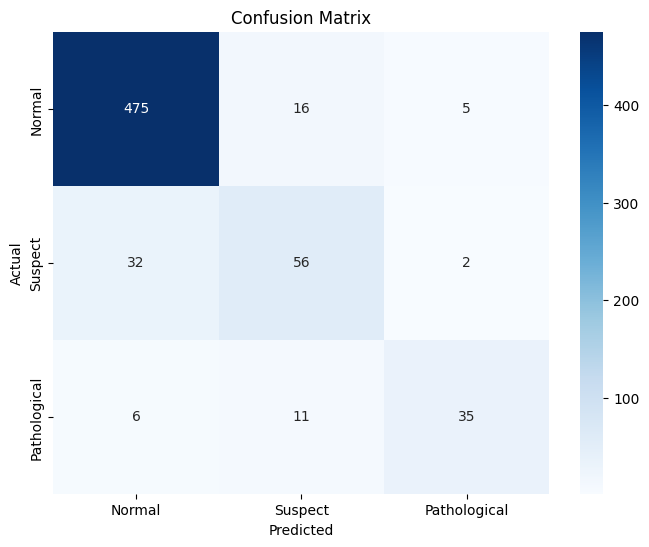

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Suspect", "Pathological"],
            yticklabels=["Normal", "Suspect", "Pathological"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

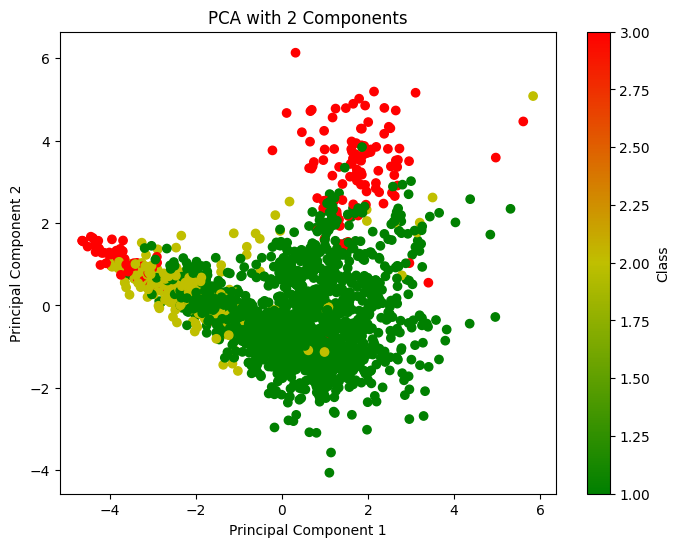

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the data and transform it
X_pca = pca.fit_transform(X_df)

from matplotlib.colors import LinearSegmentedColormap

# Define color map colors
colors = [(0, 1, 0), (1, 1, 0), (1, 0, 0)]  # Green, Yellow, Red

# Create a LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('rg',["g", "y", "r"], N=256)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=my_cmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 Components')
plt.colorbar(label='Class')
plt.show()